# Introduction to scikit-learn

In [1]:
# 0. End to end scikit learn workflow
# 1. Getting the data ready
# 2. Choose the right algorithm/estimator
# 3. Fit the model/algorithm and use it to make predictions on data
# 4. Evaluating a model
# 5. Improve a model
# 6. Save and load a trained model
# 7. Putting it all together

# 0. An End to End scikit learn workflow

# 1. Get the data ready

In [1]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

In [2]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Calc YR Salary             1593 non-null   object
 1   Yearly PERS Contributions  1593 non-null   object
 2   Age                        1593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.5+ KB


In [3]:
#Check data to see how many tuples in 'age' have a null value
df.isna().sum()

Calc YR Salary               0
Yearly PERS Contributions    0
Age                          0
dtype: int64

In [4]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).replace( '0.00', regex=True ).astype(float))
cleaned_data

,Age,Calc YR Salary,Yearly PERS Contributions
0,36.0,131820.43,40836.16
1,18.0,70699.09,21899.79
2,26.0,119490.28,37012.20
3,38.0,126717.01,39203.57
4,61.0,125525.01,38790.15
...,...,...,...
1588,45.0,95706.78,19314.91
1589,33.0,144430.63,29134.32
1590,21.0,67457.92,13605.85
1591,66.0,115059.22,23108.91


In [5]:
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

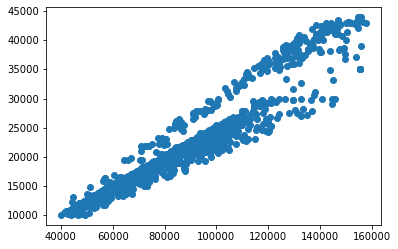

In [6]:
plt.scatter(yr_salary, pers_contributions)

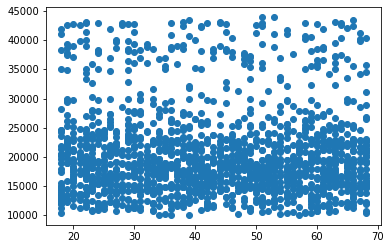

In [7]:
plt.scatter(age, pers_contributions)

<AxesSubplot:>

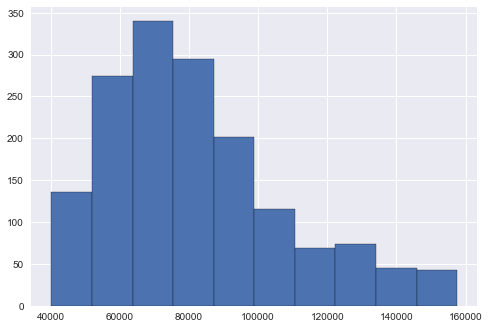

In [8]:
plt.style.use('seaborn')
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')

<AxesSubplot:>

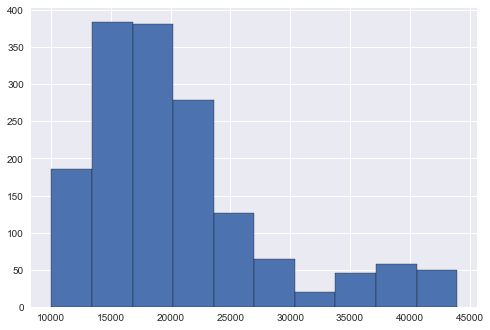

In [9]:
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')

In [10]:
#Import the TrainTestSplit class and the OneHotEncoder class
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

# 2. Choose the right algorithm

In [11]:
#Import the RandomForestRegressor class
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [12]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.9180688020925872

# 3. Use trained model to make predictions

In [14]:
#Use 'predict' on just the 'X_test' dataset to see what the model gives
regr.predict(X_test[:5])

array([35838.08661764, 23028.67140381, 21380.94541447, 32998.25804967,
       23831.85883405])

In [15]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_test[:5])

array([38970.84, 27453.69, 19109.95, 36961.15, 23655.28])

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

1436.816913040011